# Joining Weather Events & Motor Vehicle Claims

### Intro 



##### Here we will be joining some of the ACC motor claims dataframes to the weather events NZ dataframe to see the relationships. 

### Libraries and importng csvs

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# install.packages("magrittr")
# install.packages("purrr")
library(dplyr)
library(magrittr) # better handling of pipes
library(purrr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [7]:
age <- "age.csv" %>%
              read_csv() 
ethnicity <- "ethnicity.csv" %>%
              read_csv() 
gender <- "gender.csv" %>%
              read_csv()  
month <- "month.csv" %>%
              read_csv() 
region <- "region.csv" %>%
              read_csv() 
road <- "road.csv" %>%
              read_csv() 
weather <- "weather.csv" %>%
              read_csv() 

Parsed with column specification:
cols(
  age = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  ethnicity = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  gender = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  month = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  region = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  road_factor = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  Year = col_double(),
  Month =

## Research Question 1 - New ACC claims and Weather events - is there a relationship ? 

In [9]:
#need to change column name of Weather Event and Affected Area to one word 

weather_a <- weather %>% rename (weather_event = "Weather Event") %>%
    rename (affected_area = "Affected Area") %>%
    rename (year = "Year")

head(weather_a)

year,Month,affected_area,weather_event,Description
<dbl>,<chr>,<chr>,<chr>,<chr>
2011,December,Tasman,"Heavy Rain, Flood",There was very heavy rain in Tasman-Nelson which resulted in flooding and numerous slips in the region.
2011,December,Nelson,"Heavy Rain, Flood",There was very heavy rain in Tasman-Nelson which resulted in flooding and numerous slips in the region.
2011,November,West Coast,"Flood, Winds",Heavy rain brought flooding to the West Coast. There were also very high winds in Wellington and the Wairarapa.
2011,November,North Island,"Flood, Winds",Heavy rain brought flooding to the West Coast. There were also very high winds in Wellington and the Wairarapa.
2011,August,New Zealand,Snowfall,"Widespread snow in both islands caused much disruption: many roads were closed, schools were closed, CBD work was suspended in Christchurch, and power was cut to thousands of homes."
2011,July,New Zealand,Snowfall,"Widespread snow in both islands caused much disruption, with many roads closed, many flights to South Island airports cancelled."


In [12]:
#Group weather dataframe by year and collect all events in particular year in a new column 
weather_by_year <- weather_a %>%
    group_by(year) %>%
    summarise(weather_event = paste(weather_event, collapse = ","))

weather_by_year

`summarise()` ungrouping output (override with `.groups` argument)



year,weather_event
<dbl>,<chr>
2011,"Heavy Rain, Flood,Heavy Rain, Flood,Flood, Winds,Flood, Winds,Snowfall,Snowfall,Tornado,Heavy Rain, Winds,Heavy Rain, Winds,Tornado,Flood,Storm,Flood"
2012,"Tornado,Storm,Weather Bomb"
2013,"Storm,Storm,Storm,Storm,Storm"
2014,"Storm,Storm,Storm,Storm,Storm"
2015,"Storm,Storm,Storm,Flood,Tornado,Flood"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Storm, Cyclone,Cyclone,Heavy Rain, Flood"


In [13]:
# Double values seen above in weather_event column 
# remove duplicated values in weather_event column
weather_by_year <- weather_by_year %>%
    # remove spacing after commas
    separate_rows(weather_event, sep = ", ") %>%
    separate_rows(weather_event, sep = ",") %>%
    group_by(year) %>%
    summarise(weather_event = paste(unique(weather_event), collapse = ","))

weather_by_year 

`summarise()` ungrouping output (override with `.groups` argument)



year,weather_event
<dbl>,<chr>
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm"
2012,"Tornado,Storm,Weather Bomb"
2013,Storm
2014,Storm
2015,"Storm,Flood,Tornado"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Cyclone,Heavy Rain"


In [14]:
# Add total weather event column for each year 
weather_by_year  <- weather_by_year %>% 
  select(year, weather_event) %>% 
  mutate(n_event = str_count(weather_event, pattern =(",") ) + 1)

weather_by_year

year,weather_event,n_event
<dbl>,<chr>,<dbl>
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,"Tornado,Storm,Weather Bomb",3
2013,Storm,1
2014,Storm,1
2015,"Storm,Flood,Tornado",3
2016,"Cold Snap,Storm",2
2017,"Flood,Storm,Cyclone,Heavy Rain",4


In [ ]:
#group Acc claims Month df by Year , then apply sum aggregation on claims column to give year-wise total claims (sum total of all the months claims of year) made. Could use 
month <- month %>%
    group_by(year)%>%
    summarise(new_claims_total = sum(New_claims))

In [18]:
month

year,new_claims_total
<dbl>,<dbl>
2011,32299
2012,31681
2013,32445
2014,32498
2015,36145
2016,37878
2017,38596


In [19]:
# Joining month df to weather dataframe 
weather_months_joined <- merge(x = month, y = weather_by_year, by = "year", all = TRUE)%>%
    arrange(desc(new_claims_total))

weather_months_joined

year,new_claims_total,weather_event,n_event
<dbl>,<dbl>,<chr>,<dbl>
2017,38596,"Flood,Storm,Cyclone,Heavy Rain",4
2016,37878,"Cold Snap,Storm",2
2015,36145,"Storm,Flood,Tornado",3
2014,32498,Storm,1
2013,32445,Storm,1
2011,32299,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,31681,"Tornado,Storm,Weather Bomb",3


In [20]:
#weather_months_joined %>% 
    #transform(year = as.numeric(year))

In [21]:
sapply(weather_months_joined, class)

year new_claims_total    weather_event          n_event 
       "numeric"        "numeric"      "character"        "numeric"

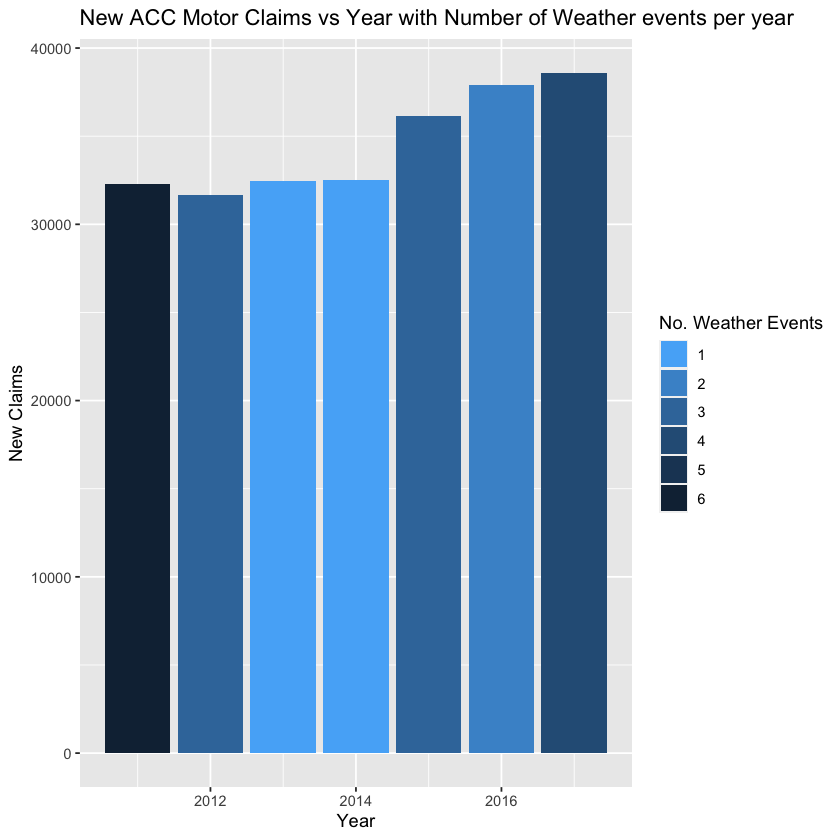

In [22]:
weather_months_plot <- weather_months_joined%>%
    ggplot(aes(x = year, y = new_claims_total, fill = n_event)) +
    geom_col()+
    labs(x="Year", y="New Claims", title = "New ACC Motor Claims vs Year with Number of Weather events per year")+
    guides(fill=guide_legend(title="No. Weather Events"))+
    scale_fill_continuous(high = "#132B43", low = "#56B1F7")

weather_months_plot
# this shows that from 2011 to 2017 , the number of new acc claims increased, 

## Research Question 2 - Age and Weather events - are older people more affected by weather events ? 

In [23]:
# See age dataframe
age %>% 
    glimpse()

Rows: 56
Columns: 4
$ age           <chr> "00-19", "00-19", "00-19", "00-19", "00-19", "00-19", "…
$ year          <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 2…
$ active_claims <dbl> 9303, 8485, 8574, 7916, 7755, 8165, 8291, 11318, 11126,…
$ New_claims    <dbl> 6465, 5863, 5932, 5780, 6341, 6671, 6706, 7562, 7438, 7…


In [24]:
# Remove column active claims
age_newclaims_df <- age %>%
    select(age, year, New_claims)
glimpse(age_newclaims_df) 

Rows: 56
Columns: 3
$ age        <chr> "00-19", "00-19", "00-19", "00-19", "00-19", "00-19", "00-…
$ year       <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 2013…
$ New_claims <dbl> 6465, 5863, 5932, 5780, 6341, 6671, 6706, 7562, 7438, 7528…


In [25]:
#Check weather_by_year df 
weather_by_year

year,weather_event,n_event
<dbl>,<chr>,<dbl>
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,"Tornado,Storm,Weather Bomb",3
2013,Storm,1
2014,Storm,1
2015,"Storm,Flood,Tornado",3
2016,"Cold Snap,Storm",2
2017,"Flood,Storm,Cyclone,Heavy Rain",4


In [26]:
# Joining age_newclaims_df and weather_by_year dataframes by year 
weather_age_joined <- merge(x = age_newclaims_df, y = weather_by_year, by = "year", all = TRUE) %>%
    arrange(age)

weather_age_joined

year,age,New_claims,weather_event,n_event
<dbl>,<chr>,<dbl>,<chr>,<dbl>
2011,00-19,6465,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,00-19,5863,"Tornado,Storm,Weather Bomb",3
2013,00-19,5932,Storm,1
2014,00-19,5780,Storm,1
2015,00-19,6341,"Storm,Flood,Tornado",3
2016,00-19,6671,"Cold Snap,Storm",2
2017,00-19,6706,"Flood,Storm,Cyclone,Heavy Rain",4
2011,20-29,7562,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,20-29,7438,"Tornado,Storm,Weather Bomb",3


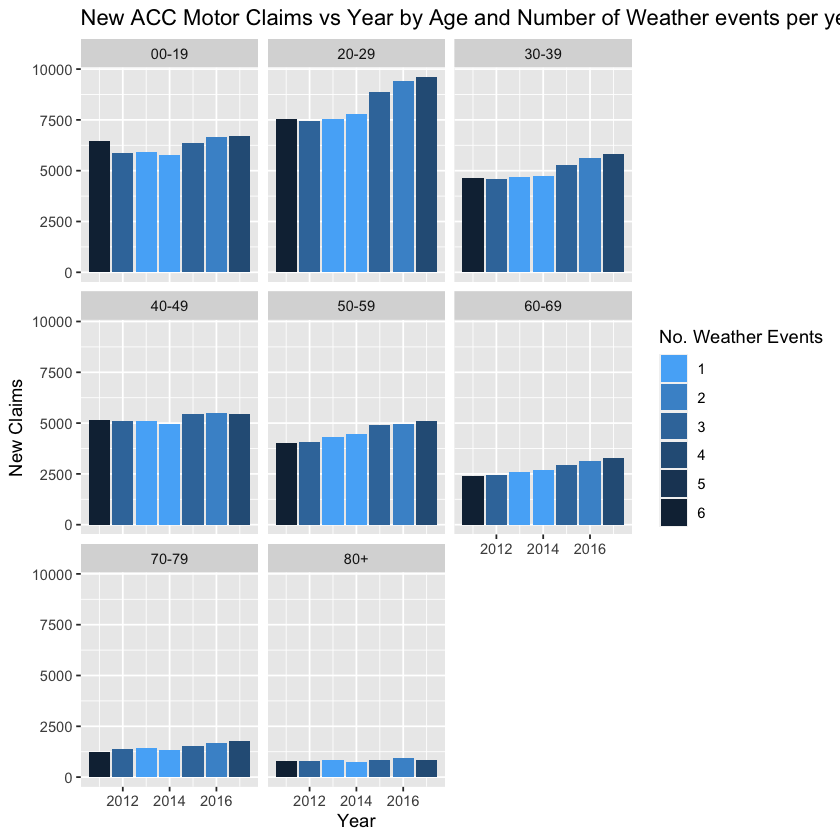

In [27]:
# Plot new_claims by year for each age range and colour by number of weather events for particular years. 
weather_age_plot <- weather_age_joined %>%
  ggplot(aes(year, New_claims, group = age, fill = n_event)) +
    geom_col() +
    facet_wrap(~ age)+
    labs(x="Year", y="New Claims", title = "New ACC Motor Claims vs Year by Age and Number of Weather events per year")+
    guides(fill=guide_legend(title="No. Weather Events"))+
    scale_fill_continuous(high = "#132B43", low = "#56B1F7")

weather_age_plot

In [28]:
# Save the plots 
ggsave(
  "weather-ageplot.png",
  plot = weather_age_plot,
  scale = 1,
  width = 8,
  height = 5,
  dpi = 300)

In [29]:
# Save the plots 
ggsave(
  "weather-months-plot.png",
  plot = weather_months_plot,
  scale = 1,
  width =8,
  height = 5,
  dpi = 300)

## Research Question 3 - Acc Claim Road factor and Weather events - what are the most vulnerable mode of transport.


In [30]:
# See road dataframe
road %>% 
    glimpse()

Rows: 70
Columns: 4
$ road_factor   <chr> "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "Cycli…
$ year          <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 2…
$ active_claims <dbl> 20, 24, 42, 47, 49, 61, 52, 2470, 2501, 2508, 2318, 228…
$ New_claims    <dbl> 10, 18, 43, 38, 50, 61, 45, 1708, 1747, 1680, 1581, 163…


In [31]:
# Remove active_claims variable 
road_newclaims_df <- road %>%
    select(road_factor, year, New_claims)
glimpse(road_newclaims_df)

Rows: 70
Columns: 3
$ road_factor <chr> "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "Cycling…
$ year        <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 201…
$ New_claims  <dbl> 10, 18, 43, 38, 50, 61, 45, 1708, 1747, 1680, 1581, 1632,…


In [32]:
weather_road_joined <- merge(x = road_newclaims_df, y = weather_by_year, by = "year", all = TRUE) %>%
    arrange(road_factor)

weather_road_joined

year,road_factor,New_claims,weather_event,n_event
<dbl>,<chr>,<dbl>,<chr>,<dbl>
2011,ATV,10,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,ATV,18,"Tornado,Storm,Weather Bomb",3
2013,ATV,43,Storm,1
2014,ATV,38,Storm,1
2015,ATV,50,"Storm,Flood,Tornado",3
2016,ATV,61,"Cold Snap,Storm",2
2017,ATV,45,"Flood,Storm,Cyclone,Heavy Rain",4
2011,Cycling,1708,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,Cycling,1747,"Tornado,Storm,Weather Bomb",3


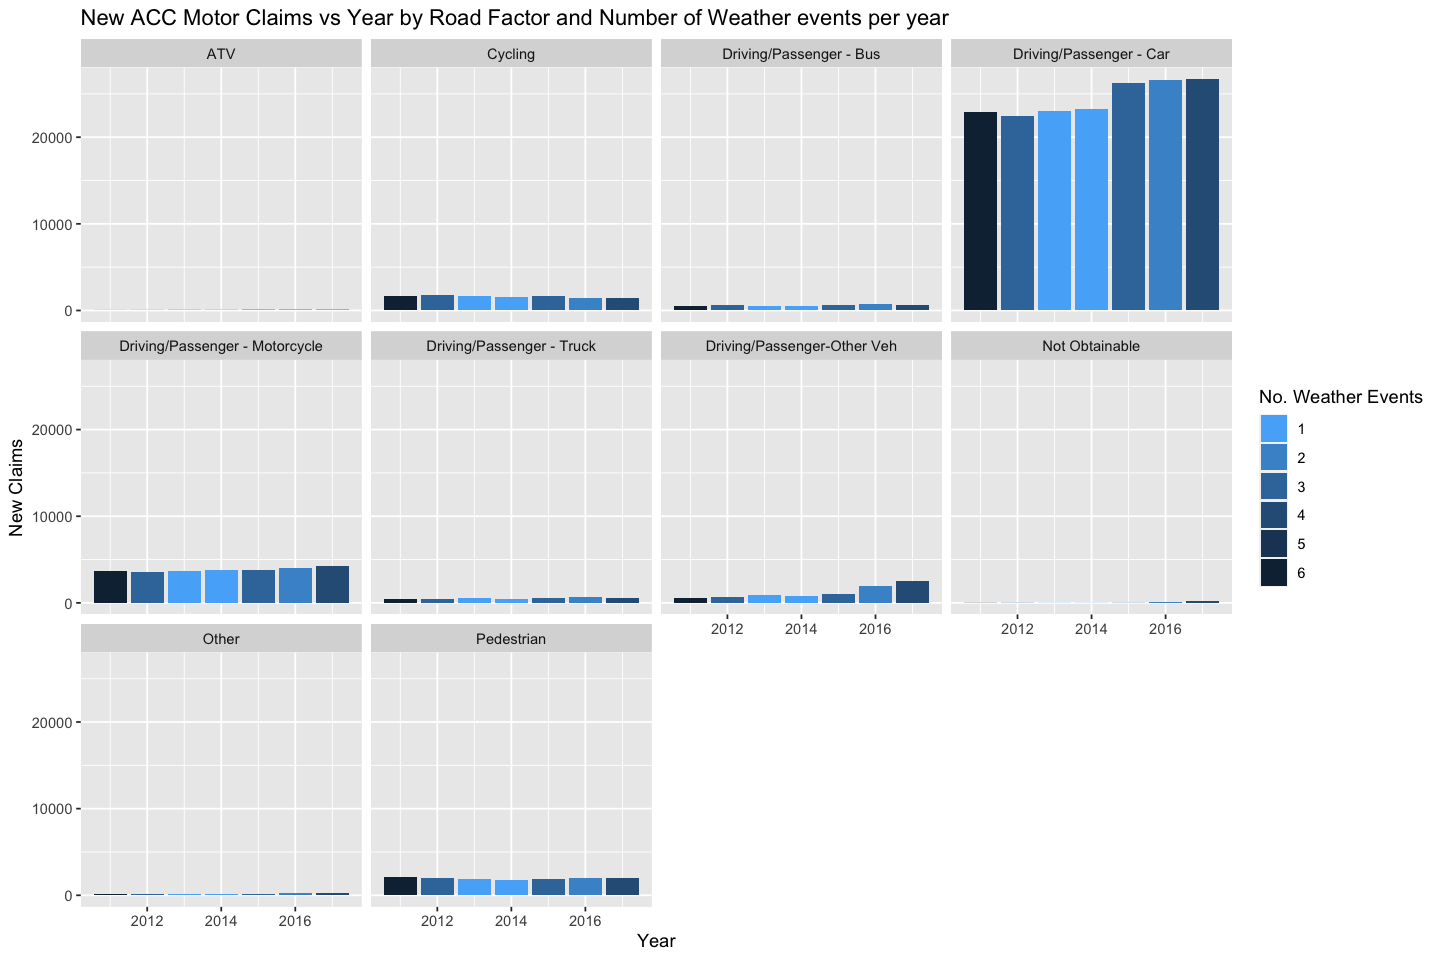

In [33]:
#labels <- c("Driving/Passenger - Bus" = "Bus", "Driving/Passenger - Car" = "Men")
#labeller=labeller(road_factor = labels)
options(repr.plot.width=12, repr.plot.height=8)
weather_road_plot <- weather_road_joined %>%
  ggplot(aes(year, New_claims, group = road_factor, fill = n_event)) +
    geom_col() +
    facet_wrap(~ road_factor)+
    labs(x="Year", y="New Claims", title = "New ACC Motor Claims vs Year by Road Factor and Number of Weather events per year" )+
    guides(fill=guide_legend(title="No. Weather Events"))+
    scale_fill_continuous(high = "#132B43", low = "#56B1F7")

weather_road_plot 

In [34]:
# Save the plot 
ggsave(
  "weather_road_plot.png",
  plot = weather_road_plot,
  scale = 1,
  width = 12,
  height = 8,
  dpi = 300)

## Research Question 4 - Acc Claim Ethnicity and Weather events - is there a relationship ? 

In [35]:
# Remove active_claims variable 
ethinicty_newclaims_df <- ethnicity %>%
    select(ethnicity, year, New_claims)
glimpse(road_newclaims_df)

Rows: 70
Columns: 3
$ road_factor <chr> "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "ATV", "Cycling…
$ year        <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 201…
$ New_claims  <dbl> 10, 18, 43, 38, 50, 61, 45, 1708, 1747, 1680, 1581, 1632,…


In [37]:
weather_ethnicity_joined <- merge(x = ethinicty_newclaims_df, y = weather_by_year, by = "year", all = TRUE) %>%
    arrange(ethnicity)

weather_ethnicity_joined

year,ethnicity,New_claims,weather_event,n_event
<dbl>,<chr>,<dbl>,<chr>,<dbl>
2011,Asian,2784,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,Asian,2917,"Tornado,Storm,Weather Bomb",3
2013,Asian,2982,Storm,1
2014,Asian,3191,Storm,1
2015,Asian,3874,"Storm,Flood,Tornado",3
2016,Asian,4042,"Cold Snap,Storm",2
2017,Asian,4401,"Flood,Storm,Cyclone,Heavy Rain",4
2011,European,21170,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,European,20661,"Tornado,Storm,Weather Bomb",3


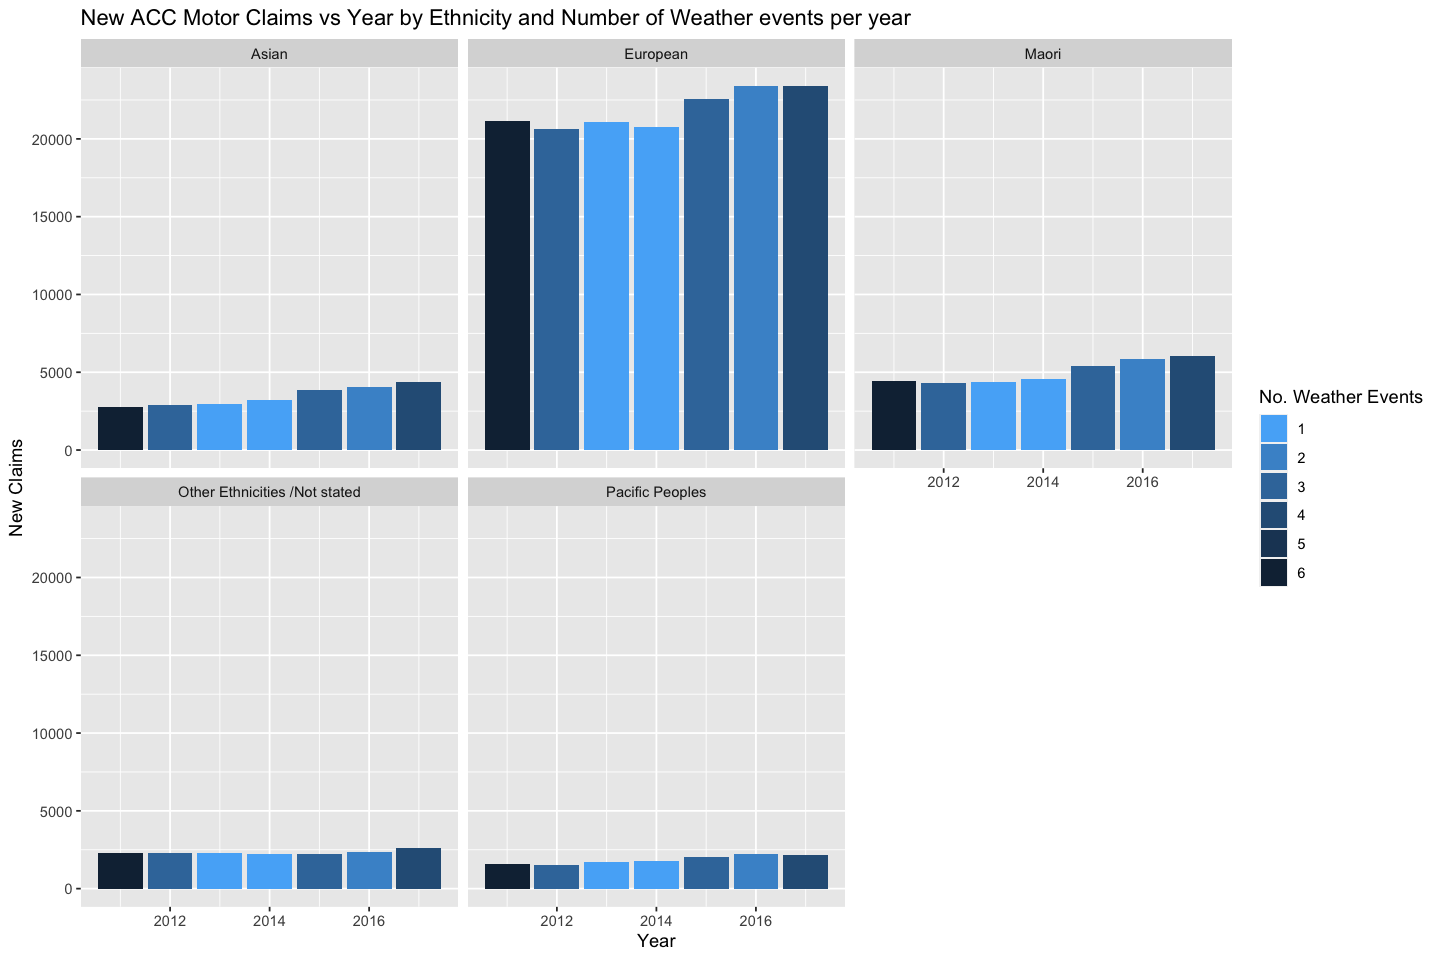

In [38]:
#labels <- c("Driving/Passenger - Bus" = "Bus", "Driving/Passenger - Car" = "Men")
#labeller=labeller(road_factor = labels)
options(repr.plot.width=12, repr.plot.height=8)
weather_ethnicity_plot <- weather_ethnicity_joined %>%
  ggplot(aes(year, New_claims, group = ethnicity, fill = n_event)) +
    geom_col() +
    facet_wrap(~ ethnicity)+
    labs(x="Year", y="New Claims", title = "New ACC Motor Claims vs Year by Ethnicity and Number of Weather events per year" )+
    guides(fill=guide_legend(title="No. Weather Events"))+
    scale_fill_continuous(high = "#132B43", low = "#56B1F7")

weather_ethnicity_plot 

In [39]:
# Save the plot 
ggsave(
  "weather_ethnicity_plot.png",
  plot = weather_ethnicity_plot ,
  scale = 1,
  width = 12,
  height = 8,
  dpi = 300)